<a href="https://colab.research.google.com/github/davidmf17/Rocketry_Tools_P_CS_Final_Project/blob/main/Rocketry_Tools_P%26CS_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P&CS Final Project - **Rocketry Tools.**
## Authors. - Dylan Hernández Patiño. - Diego Gómez Rivera. - David Miranda Franco.
## 11/June/2024.

# CO2 Pipe Selection


In [ ]:
import math
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
import pandas as pd
'''With this code, we pretend to create an easy way to calculate the amount of CO2 needed for an ejection system for a rocket according to some
parameters that can change, such as the temperature, rocket diameter, the quantity of shear pins needed, etc'''


class CO2Pipe(ABC): #Create a class to selec the CO2 pipe
  @abstractmethod
  #Create the functions to calculate the pressure for ejection and the quantity needed of CO2 for the ejection
  def calc_pressure_ejection(self):
    pass
  def calc_mol_pipe(self):
    pass

#Create for the rocket for calculate the quantitiy of CO2 Needed
class Rocket(CO2Pipe):
    def __init__(self, rocket_diameter, shear_pin, mass_eject, length_pressure, temperature):
        self.length_pressure = length_pressure  # Length of the pressured section in meters [m]
        self.temperature = temperature  #Temperature at the point of ejection in Kelvin [K]
        self.rocket_diameter = rocket_diameter #Rocket diameter in meters [m]
        self.shear_pin = shear_pin #Shear force needed to breake the shear pin in Newtons [N]
        self.mass_eject = mass_eject #Mass needed to eject in Kilograms [Kg]
        self.pressure = None

    def calc_pressure_ejection(self):
        self.pressure = ((4*self.shear_pin + (self.mass_eject*200))/(self.rocket_diameter)**2*(math.pi/4))


    def  calc_mol_pipe(self):
        return(((self.pressure)*(self.rocket_diameter)**2*(math.pi/4)*self.length_pressure)/((self.temperature)*(8.3145)))

In [ ]:
#Create an object to do the calculation
rocket_test = Rocket(rocket_diameter=0.16, shear_pin = 530, mass_eject = 10, length_pressure = 0.3, temperature = 250)
rocket_test.calc_pressure_ejection()

#Obtain the quantity of moles needed and also do the conversion to grams
CO2_mol = rocket_test.calc_mol_pipe()
CO2_grams = CO2_mol*44.01
print("Pressure of CO2 ejection:", rocket_test.pressure, "Pascals")
print("Total grams of CO2 needed", CO2_grams)



Pressure of CO2 ejection: 126400.01692177683 Pascals
Total grams of CO2 needed 16.142598895280567


**Graphs for variable volume of the pressure zone**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
'''For this case, the code will run multiple calculations to show how the variation of the rocket diameter
and lenght of the presurized zone changes the volume of this zone itself, this is needed at the moment of use of the
ideal gas formula PV = RTn'''


def calc_volume(diameter, lenght):  #Define a function that depends on the diameter and lenght for the calculation of the volume
  return((math.pi/4)*diameter**2*lenght) #Volume of a cylinder (Rocket Shape)

def vol_var_plot(all_diameters, all_lenghts, volume_operation): #Define the function to plot all the volumes calculated
  X, Y = np.meshgrid(all_diameters, all_lenghts)  #Create a grid in X and Y that shows all the diameters and all the lenghts to analyse

  Z = calc_volume(X,Y)  #The Z axis shows the volume calculation using the parameters in the X and Y axis (Diameter and lenght)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d') #Grid 1X1 for the 1 subplot, being a 3d projection
  ax.plot_surface(X, Y, Z, cmap='plasma')

  #Titles for the plot

  ax.set_xlabel('Diameter (m)')
  ax.set_ylabel('Length (m)')
  ax.set_zlabel('Volume (m^3)')
  ax.set_title('Volume Variation with the variation of the Diameter and Length')
  plt.show()

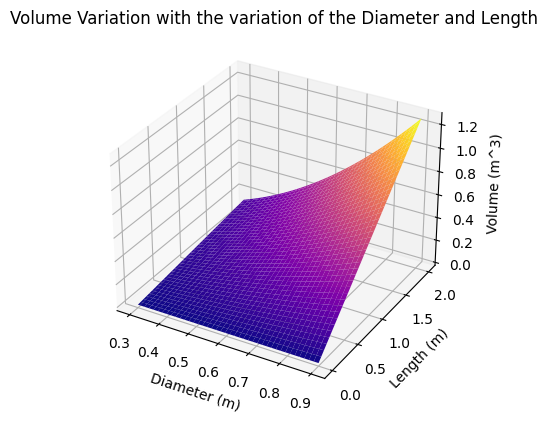

In [ ]:
all_diameters = np.linspace(0.9, 0.3, 80) #Range from 0.1 m to 0.3 m for the diameter of the rocket
all_lenghts = np.linspace(0,2,80) #Range from 0 meters to 2 meters for the lenght of the space of presurrization


vol_var_plot(all_diameters, all_lenghts, calc_volume)

Variation of the pressure needed according to the variation of the volume of pressurization

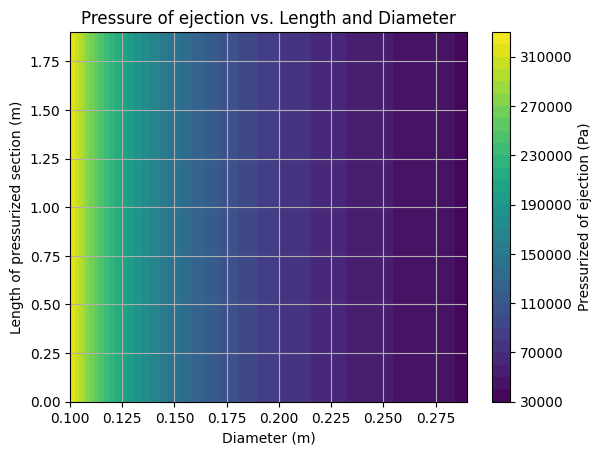

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

'''For this case, the code will run multiple calculations to show how the variation of the rocket diameter
and lenght of the presurized zone changes the volume pressure needed to do the ejection'''

#Define the initial parameters for the rocket, such as the mass to eject, the shear pins force and the temperature
shear_pin = 530 #Shear force needed to breake the shear pin in Newtons [N]
temperature = 250 #Temperature at the point of ejection in Kelvin [K]
mass_eject = 10 #Mass needed to eject in Kilograms [Kg]


# Create a range of lengths of pressured section and diameters of the rocket
lengths_pressures = np.arange(0, 2, 0.1)  # Lengths from 1 to 20 meters with an step of 0.1 m
diameters_test = np.arange(0.1, 0.3, 0.01)  # Diameters from 0.1 to 1 meter with a step of 0.01 m

'''With this line, the program creates an array filled with zeros but with the space for all the possible combinantions between lenght and diameter
for the calc of the volume of the zone of ejection'''
pressures = np.zeros((len(lengths_pressures), len(diameters_test)))


'''Bucle with "for" to do the calculation with the variation of every parameter; with the function of enumerate, the code can
access easy to every parameter in the arange for lenght an after thar in the arange for the diameter, after that, the code return that value
to the previus array filled with cero, and change those values for the ones that were calculated.'''

for i, length_pressure in enumerate(lengths_pressures):
    for j, rocket_diameter in enumerate(diameters_test):
        rocket_test = Rocket(rocket_diameter, shear_pin, mass_eject, length_pressure, temperature)
        rocket_test.calc_pressure_ejection() #Function to calculate the pressure of ejection needed
        pressures[i, j] = rocket_test.pressure #The array is filled with the previus calculations of the pressure

# Create a 2D contour plot
X, Y = np.meshgrid(diameters_test, lengths_pressures)
plt.contourf(X, Y, pressures, levels=30, cmap='viridis')
plt.colorbar(label='Pressurized of ejection (Pa)')
plt.xlabel('Diameter (m)')
plt.ylabel('Length of pressurized section (m)')
plt.title('Pressure of ejection vs. Length and Diameter')
plt.grid()
plt.show()

Variation of the grams of CO2 needed according to the variation of the diameter of the rocket and lenght of the pressured section

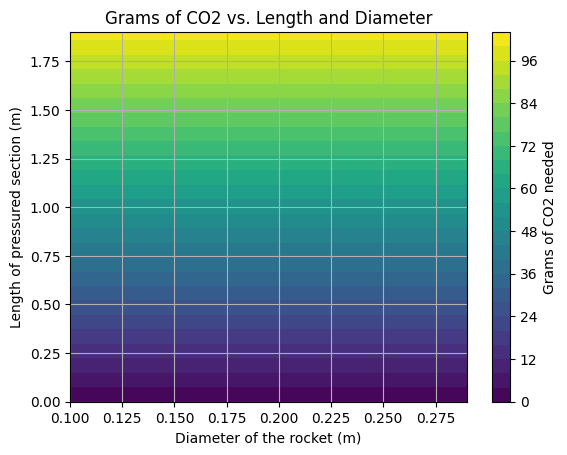

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

'''For this case, the code will run multiple calculations to show how the variation of the rocket diameter
and lenght of the presurized zone changes the grams of CO2 needed to do the ejection'''

#Define the initial parameters for the rocket, such as the mass to eject, the shear pins force and the temperature
shear_pin = 530 #Shear force needed to breake the shear pin in Newtons [N]
temperature = 250 #Temperature at the point of ejection in Kelvin [K]
mass_eject = 10 #Mass needed to eject in Kilograms [Kg]


# Create a range of lengths of pressurized section and diameters of the rocket
lengths_pressures = np.arange(0, 2, 0.1)  # Lengths from 1 to 20 meters with an step of 0.1 m
diameters_test = np.arange(0.1, 0.3, 0.01)  # Diameters from 0.1 to 1 meter with a step of 0.01 m


'''With this line, the program creates an array filled with zeros but with the space for all the possible combinantions between lenght and diameter
For the calc of the volume of the zone of ejection'''
MolCO2 = np.zeros((len(lengths_pressures), len(diameters_test)))


'''Bucle with "for" to do the calculation with the variation of every parameter; with the function of enumerate, the code can
access easy to every parameter in the arange for lenght an after thar in the arange for the diameter, after that, the code return that value
to the previus array filled with cero, and change those values for the ones that were calculated.'''
for i, length_pressure in enumerate(lengths_pressures):
    for j, rocket_diameter in enumerate(diameters_test):
        rocket_test = Rocket(rocket_diameter, shear_pin, mass_eject, length_pressure, temperature)
        rocket_test.calc_pressure_ejection() #Function to do the calculation of the pressure of ejection needed
        MolCO2[i, j] = rocket_test.calc_mol_pipe()*44.01 #The array is filled with the calculation of the quantity of grams needed according to the lenght and diameter

# Create a 2D contour plot
X, Y = np.meshgrid(diameters_test, lengths_pressures)
plt.contourf(X, Y, MolCO2, levels=30, cmap='viridis')
plt.colorbar(label='Grams of CO2 needed')
plt.xlabel('Diameter of the rocket (m)')
plt.ylabel('Length of pressured section (m)')
plt.title('Grams of CO2 vs. Length and Diameter')
plt.grid()
plt.show()

# Air Brakes - In the Rocket

In [ ]:
# Initial values.
alt_Ap = 3000                                                                          # Given in m, apogee goal.
vert_vel_init = 0                                                                       # Given in m/s, rocket initial vertical velocity.
burning = 4.72                                                                           # Given in s, motor burning time.
a_motor = 78                                                                              # Given in m/s^2, acceleration by motor.
gravity = 9.81                                                                         # Given in m/s^2, earth gravity value.
# Previous calculus.
Final_burning_vel = (vert_vel_init)+((a_motor)*(burning))
Burning_alt = ((vert_vel_init)*(burning))+((0.5)*(a_motor)*((burning)**2))             # Given in m/s, final burning velocity of the rocket by motor.
Rise_time = (Final_burning_vel)/(gravity)
inertial_alt = ((Final_burning_vel)*(Rise_time))-((0.5)*(gravity)*((Rise_time)**2))
apogee = Burning_alt + inertial_alt

while True:

  if apogee < 3000:
    print("activate alpha degrees airbrakes mechanims")
    break

  if apogee == 3000:
    print("activate alpha degrees airbrakes mechanims")
    break

  if apogee > 3000:
    print("activate alpha degrees airbrakes mechanims")
    break

  else:
    print("The entered value is negative, please reconsider your apogee value or recalibrate rocket avionics sensors")

activate alpha degrees airbrakes mechanims


# Aerodynamic Forces Actuation - In the Rocket

In [ ]:
# General results.

# Initial values.
Vel = 270                                                           # Given in m/s, maximum rocket velocity.
Alt = 800                                                           # Given in m, rocket altitude at maximum velocity moment.
# Constant values.
m_air = 0.02896351244                                               # Given in kg/mol, air molar mass.
R = 8.314472                                                        # Given in Pa*m^3/mol*K, universal gas constant.
# Previusly calculated values.
t = ((-0.01)*(Alt))+20                                              # Given in °C, temperature at maximum velocity moment.
T = t + (273.15)                                                    # Given un Kelvin, air temperature.
P_atm = (1013.25)*((1-(0.0000225577*Alt))**5.2559)                  # Given un Pa, atmospheric air pressure at maximum velocity moment.
Den_air = ((m_air)*(P_atm))/((R)*(T))                               # Given in kg/m^3, air density in the maximum rocket velocity moment.
Mach = (Vel)/(343)

print("Temperature in celsius degrees at", Alt,"m is:", t, "°C")
print("Atmospheric pressure at", Alt,"m is:", P_atm, "Pa")
print("Air density at", Alt,"m is:", Den_air, "kg/m^3")

Temperature in celsius degrees at 800 m is: 12.0 °C
Atmospheric pressure at 800 m is: 920.7634722740789 Pa
Air density at 800 m is: 0.011248413141459015 kg/m^3


In [ ]:
# Nosecone drag force calculation
# Drag coefficient estimation.
Cd_N = 0.04                                                                                        # Given dimensionless, taken by experiental and computational analysis.
# Component area.
A_ref_N = 7.2467259                                                                              # Given in m^2, area of the component by CAD file.
# Using drag force formula
Fd_N = (1/2)*(Cd_N)*(Den_air)*((Vel)**2)*(A_ref_N)
print("Nose cone drag force at", Alt,"m and", Vel, "m/s or", Mach, "mach, is", Fd_N, "N")

Nose cone drag force at 800 m and 270 m/s or 0.7871720116618076 mach, is 118.84765526163044 N


In [ ]:
# Body drag force calculation
import math
# Drag coefficient estimation.
Cd_B = 0.04                                                                                        # Given dimensionless, taken by experiental and computational analysis.
# Component area.
Length = 3.7                                                                                     # Given in m, length of the body component.
Radio_ext = 0.176
# Area calculation.                                                                            # Given in m, outer radio of the body component.
A_ref_B = ((2)*(math.pi)*(Length)*(Radio_ext))+((2)*(math.pi)*((Radio_ext)**2))                        # Given in m^2, area of the component.
# Using drag force formula.
Fd_B = (1/2)*(Cd_B)*(Den_air)*((Vel)**2)*(A_ref_B)
print("Body drag force at", Alt,"m and", Vel, "m/s or", Mach, "mach, is", Fd_B, "N")

Body drag force at 800 m and 270 m/s or 0.7871720116618076 mach, is 70.29510559422732 N


In [ ]:
# Fins force calculation
import math
# Drag coefficient estimation.
Cd_F = 0.04                                                                                        # Given dimensionless, taken by experiental and computational analysis.
# Component area for trapezoidal fins geometry.
Root_chord = 3.7                                                                                   # Given in m, root chord of the fin design.
Tip_chord = 0.176                                                                                  # Given in m, tip chord of the fin design.
Height = 16.5                                                                                      # Given in m, distance between root chord and tip chord.
Sweep_angle = 44.1
Fins_number = 4                                                                                    # Given in °, angle between height and leading edge.
# Area calculation.
A_ref_F = ((((Root_chord)+(Tip_chord))/2)*(Height))*(2)*(Fins_number)                                                                          # Given in m^2, area of the component.
# Using drag force formula.
Fd_F = (1/2)*(Cd_F)*(Den_air)*((Vel)**2)*(A_ref_F)
print("Fins drag force at", Alt,"m and", Vel, "m/s or", Mach, "mach, is", Fd_F, "N")

Fins drag force at 800 m and 270 m/s or 0.7871720116618076 mach, is 4195.430073933009 N


In [ ]:
# Inertial force in the rocket at moment required.
# Variables calculation.
a = 75.63                                                                                              # Given in m/s^2, rocket acceleration from software analysis.
m_roc = 60                                                                                         # Given in Kg, rocket mass.
a_g = (a)/(9.81)
# Using inertial forces formula.
I_f = (a)*(m_roc)

In [ ]:
# Thrust force
# By motor, you know that value.
Thrust = 4216                                                                                      # Given in N, maximum rocket thrust.

## Rocket axial forces.

In [ ]:
F_ax = -(Thrust)+(Fd_N)+(Fd_B)+(Fd_F)+(I_f)

print("The rocket total axial forces at", Vel, "m/s,", Alt,"m and an acceleration of", a, "m/s^2 or", a_g, "G, is:", F_ax, "N")

The rocket total axial forces at 270 m/s, 800 m and an acceleration of 75.63 m/s^2 or 7.709480122324158 G, is: 4706.372834788866 N


# Selection Matrix

In [17]:
import numpy as np
import pandas as pd

# Create a class to represent and evaluate different design options based on multiple variables.
class decision_matrix:

  # Initializes the decision_matrix with design options, variables, their percentages, and max/min info.
  def __init__(self, design_options_names, variables_names, variables_percentages, max_or_min_info):
    self.design_options_names = design_options_names  # List of design options names.
    self.variables_names = variables_names # List of the variables names that the program is going to evaluate.
    self.variables_percentages = variables_percentages # List of the percentages of each variable
    self.max_or_min_info = max_or_min_info # List indicating if the user wants to maximize (True) or minimize (False) each variable.
    self.design_options_number = self.design_options_names.__len__() # Determine the lenght of the list of options (Number of options to evaluate).
    self.variables_number = self.variables_names.__len__() # Determine the lenght of the list of variables (Number of variables to evaluate).

    self.original_matrix = np.zeros((self.design_options_number, self.variables_number)) # Generate an initial matrix filled with zeros.
    self.normalized_matrix = np.zeros((self.design_options_number, self.variables_number)) # Generate an initial matrix filled with zeros.
    self.final_score = np.zeros((self.design_options_number)) # Generate an array filled with zeros.

  def add_design_options_names(self, design_options_names):
    # Add the names of each option to evaluate
    pass

  def add_value(self, option_name, variable_name, value):
    # Add a value to the original matrix, for a given design option and variable.
    design_option_index = self.design_options_names.index(option_name)
    variable_index = self.variables_names.index(variable_name)
    self.original_matrix[design_option_index, variable_index] = value

  def add_value_per_option(self, option_name, values):
    # Adds multiple values to the original matrix, for a given design option, for all variables.
    design_option_index = self.design_options_names.index(option_name)
    for i in range(len(self.variables_names)):
        self.add_value(option_name, self.variables_names[i], values[i])

  def show_matrix(self):
    # Displays the original matrix with an additional row for variable percentages.
    df = pd.DataFrame(self.original_matrix, index=self.design_options_names, columns=self.variables_names)
    df.loc['Percentage per variable [%]'] = self.variables_percentages
    return df

  def analyze_item(self, variable_name, max=True):
    # Analyzes a variable and prints the design option with the maximum or minimum value.
    if(max):
      print("The maximum value of '" + str(variable_name) + "' is " + str(np.max(self.original_matrix[:, self.variables_names.index(variable_name)])) + " and belongs to the design option '" + str(self.design_options_names[np.argmax(self.original_matrix[:, self.variables_names.index(variable_name)])]) + "'")
    else:
      print("The minimum value of '" + str(variable_name) + "' is " + str(np.min(self.original_matrix[:, self.variables_names.index(variable_name)])) + " and belongs to the design option '" + str(self.design_options_names[np.argmin(self.original_matrix[:, self.variables_names.index(variable_name)])]) + "'")

  def calculate_normalized_matrix(self):
    # Calculates the normalized matrix based on whether to maximize or minimize each variable.
    min_or_max_value = 0

    for i in range(self.variables_number):
      if(self.max_or_min_info[i]):
        min_or_max_value = (np.max(self.original_matrix[:, i]))
        for j in range(self.design_options_number):
          self.normalized_matrix[j][i] = round(self.original_matrix[j][i] / min_or_max_value, 3)
      else:
        min_or_max_value = (np.min(self.original_matrix[:, i]))
        for j in range(self.design_options_number):
          self.normalized_matrix[j][i] = round(min_or_max_value / self.original_matrix[j][i], 3)

  def show_normalized_matrix(self):
    # Shows the normalized matrix
    self.calculate_normalized_matrix()

    dfNormalize = pd.DataFrame(self.normalized_matrix, index=self.design_options_names, columns=self.variables_names)
    dfNormalize.loc['Percentage per variable [%]'] = self.variables_percentages
    return dfNormalize

  def best_option(self):
    # Calculates and prints the best design option, based on the final scores.
    self.calculate_normalized_matrix()
    for j in range(self.design_options_number):
      for i in range(self.variables_number):
        self.final_score[j] += self.normalized_matrix[j][i] * self.variables_percentages[i]
      print("Final score for the "+ str(self.design_options_names[j]) + " design option is equal to " + str(round(self.final_score[j])) + " points")

    best_design_option_index = np.argmax(self.final_score)

    print("The best option is " + str(self.design_options_names[best_design_option_index]) + " with a score of " + str((round(self.final_score[best_design_option_index]))) + " points over 100 possible")

In [18]:
# User defined parameters, to do the matrix selection process

design_options = ["Hemispherical Parachute", "Ribbed Parachute", "Ring Sail Parachute", "Ribbless Parachute", "Cross Parachute"]
variables_to_evaluate = ["Drag Coefficient (CD)", "Inflated Shape (Dp/Do)", "Angle of Oscillation (°)", "Shock Load Factor(-)"]
percentages = [30, 30, 15, 25]
max_or_min_parameters = [True, True, False, False]

parachute_matrix = decision_matrix(design_options, variables_to_evaluate, percentages, max_or_min_parameters)

parachute_matrix.add_value_per_option("Hemispherical Parachute", [0.695, 0.66, 12.5, 1.6])
parachute_matrix.add_value_per_option("Ribbed Parachute", [0.35, 0.62, 1, 1.2])
parachute_matrix.add_value_per_option("Ring Sail Parachute", [0.8, 0.69, 7.5, 1.1])
parachute_matrix.add_value_per_option("Ribbless Parachute", [0.32, 0.63, 1.5, 1.4])
parachute_matrix.add_value_per_option("Cross Parachute", [0.725, 0.69, 0.15, 1.15])

In [19]:
parachute_matrix.show_matrix()
parachute_matrix.show_normalized_matrix()

,Drag Coefficient (CD),Inflated Shape (Dp/Do),Angle of Oscillation (°),Shock Load Factor(-)
Hemispherical Parachute,0.869,0.957,0.012,0.688
Ribbed Parachute,0.437,0.899,0.150,0.917
Ring Sail Parachute,1.000,1.000,0.020,1.000
Ribbless Parachute,0.400,0.913,0.100,0.786
Cross Parachute,0.906,1.000,1.000,0.957
Percentage per variable [%],30.000,30.000,15.000,25.000


In [20]:
parachute_matrix.best_option()

Final score for the Hemispherical Parachute design option is equal to 72 points
Final score for the Ribbed Parachute design option is equal to 65 points
Final score for the Ring Sail Parachute design option is equal to 85 points
Final score for the Ribbless Parachute design option is equal to 61 points
Final score for the Cross Parachute design option is equal to 96 points
The best option is Cross Parachute with a score of 96 points over 100 possible
